# Space Weather Startup

## Part 1: Data Scraping and Preparation

### Step 1: Scrape your competitors data

In [1]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Send request
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:50.0) Gecko/20100101 Firefox/50.0'}
res = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html",headers = headers)

In [3]:
# Make the soup with lxml parser
bs = BeautifulSoup(res.text, 'lxml')

In [4]:
# Get the table
tab = bs.findAll("table")

In [5]:
tab1 = bs.findAll({"tr"})

In [6]:
# Build rank column
rank = [0] * 50
y = 1
for i in range(0, 50):
    rank[i] = y
    y += 1

In [7]:
# Scrape x-classification data into column
x_classification = [0] * 50
y = 0
for i in range(1, 51):
    x_classification[y] = tab1[i].findAll({"td"})[1].get_text()
    y += 1

In [8]:
# Scrape data into column
date = [0] * 50
y = 0
for i in range(1, 51):
    date[y] = tab1[i].findAll({"td"})[2].get_text()
    y += 1

In [9]:
# Scrape region data into column
region = [0] * 50
y = 0
for i in range(1, 51):
    region[y] = tab1[i].findAll({"td"})[3].get_text()
    y += 1

In [10]:
# Scrape start_time data into column
start_time = [0] * 50
y = 0
for i in range(1, 51):
    start_time[y] = tab1[i].findAll({"td"})[4].get_text()
    y += 1

In [11]:
# Scrape maximum time data into column
maximum_time = [0] * 50
y = 0
for i in range(1, 51):
    maximum_time[y] = tab1[i].findAll({"td"})[5].get_text()
    y += 1

In [12]:
# Scrape end_time data into column
end_time = [0] * 50
y = 0
for i in range(1, 51):
    end_time[y] = tab1[i].findAll({"td"})[6].get_text()
    y += 1

In [13]:
# Scrape movie data into column
movie = [0] * 50
y = 0
for i in range(1, 51):
    movie[y] = tab1[i].findAll({"td"})[7].get_text()
    y += 1

In [14]:
# Put columns together
data = {'rank' : rank, 'x_classification' : x_classification, 'date' : date, 'region' : region, 'start_time' : start_time, 'maximum_time' : maximum_time, 'end_time' : end_time, 'movie' : movie  }

In [15]:
# Build Data Frame
df = pd.DataFrame(data)

In [16]:
# Adjust index
df.index = df.index + 1

In [17]:
# Display data frame
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
1,1,X28+,2003/11/04,0486,19:29,19:53,20:06,MovieView archive
2,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2+,2003/10/28,0486,09:51,11:10,11:24,MovieView archive
4,4,X17+,2005/09/07,0808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10,2003/10/29,0486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9,2006/12/05,0930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,0486,17:03,17:25,17:39,MovieView archive


### Step 2: Tidy the top 50 solar flare data 

In [18]:
# Remove last column
df = df.iloc[:,:-1]

In [19]:
# Use datetime import to combine the date and time columns into 3 datetime columns
df_start_time = pd.to_datetime(df['date'] + ' ' + df['start_time'])
df_maximum_time = pd.to_datetime(df['date'] + ' ' + df['maximum_time'])
df_end_time = pd.to_datetime(df['date'] + ' ' + df['end_time'])

# Add new columns
df['start_datetime'] = df_start_time
df['max_datetime'] = df_maximum_time
df['end_datetime'] = df_end_time

# Drop uncessary columns 
df = df.drop(['date', 'start_time', 'maximum_time', 'end_time'], 1)

In [20]:
# Change column order
df = df[['rank', 'x_classification', 'start_datetime', 'max_datetime', 'end_datetime', 'region']]

# Replace all instances of '-' with '<NA>' as stated by the prompt
df = df.replace('-', '<NA>')

In [21]:
# Display new dataframe
df

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,0486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,0486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,0808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,0486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,0930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,0486


### Step 3: Scrape the NASA data

In [22]:
# Send request
res2 = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')

In [23]:
# Make Soup, parse with lxml
soup2 = BeautifulSoup(res2.text, 'lxml')

In [24]:
# Get table
tab2 = soup2.find('pre')

In [25]:
# Get table lines
content = tab2.get_text()
lines = content.split('\n')

In [26]:
# Get start dates
start_date = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    start_date[y] = split[0]
    y += 1

In [27]:
# Get start times
start_time = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    start_time[y] = split[1]
    y += 1

In [28]:
# Get end_date
end_date = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    end_date[y] = split[0][0:5] + split[2]
    y += 1

In [29]:
# Get end times
end_time = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    if (split[3] == '24:00'):
        new_string = '23:59'
        end_time[y] = new_string
    if (split[3] != '24:00'):
        end_time[y] = split[3] 
    y += 1

In [30]:
# Get start frequency
start_frequency = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    start_frequency[y] = split[4]
    y += 1

In [31]:
# Get end frequency
end_frequency = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    end_frequency[y] = split[5]
    y += 1

In [32]:
# Get flare location
flare_location = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    flare_location[y] = split[6]
    y += 1

In [33]:
# Get flare region
flare_region = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    flare_region[y] = split[7]
    y += 1

In [34]:
# Get end frequency
flare_classification = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    flare_classification[y] = split[8]
    y += 1

In [35]:
# Get cme_date
cme_date = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    cme_date[y] = split[0][0:5] + split[9]
    y += 1

In [36]:
# Get cme_time
cme_time = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split() 
    if (cme_time[y] == "12:00"):
        cme_time[y] = "11:59"
    if (cme_time[y] != "12:00"):
        cme_time[y] = split[10]
    if (cme_time[y] == "--:--"):
        cme_time[y] = "0:00"
    y += 1

In [37]:
# Get cme_angle
cme_angle = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    cme_angle[y] = split[11]
    y += 1

In [38]:
# Get cme_width
cme_width = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    cme_width[y] = split[12]
    y += 1

In [39]:
# Get cme_speed
cme_speed = [0] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    cme_speed[y] = split[13]
    y += 1

In [40]:
# Piece data together
data2 = {'start_date' : start_date, 'start_time' : start_time, 'end_date' : end_date, 'end_time' : end_time, 'start_frequency' : start_frequency, 'end_frequency' : end_frequency, 'flare_location' : flare_location, 'flare_region' : flare_region, 'flare_classification' : flare_classification,'cme_date' : cme_date, 'cme_time' : cme_time, 'cme_angle' : cme_angle, 'cme_width' : cme_width, 'cme_speed' : cme_speed}

In [41]:
# Pandafy
df2 = pd.DataFrame(data2)

In [42]:
# Adjust index
df2.index = df2.index + 1

In [43]:
# Dispay data 
df2

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,1997/04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74,79,312
2,1997/04/07,14:30,1997/04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,Halo,360,878
3,1997/05/12,05:15,1997/05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,Halo,360,464
4,1997/05/21,20:20,1997/05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263,165,296
5,1997/09/23,21:53,1997/09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2014/12/17,04:09,2014/12/17,04:19,2900,2100,S11E33,12241,M1.1,2014/12/17,02:00,107,108,869
479,2014/12/17,05:00,2014/12/17,05:09,14000,11500,S20E09,12242,M8.7,2014/12/17,05:00,Halo,360,587
480,2014/12/18,22:31,2014/12/18,22:54,5100,1300,S11E15,12241,M6.9,2014/12/19,01:04,Halo,360,1195
481,2014/12/21,12:05,2014/12/21,12:28,14000,7400,S14W25,12241,M1.0,2014/12/21,12:12,Halo,360,669


### Step 4: Tidy the Nasa table 

In [44]:
# replace all missing instances with NAN
df2 = df2.replace('----', 'NaN')
df2 = df2.replace('-----', 'NaN')

In [45]:
# Generate is_halo
is_halo = [False] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    if (split[11] == 'Halo'):
        is_halo[y] = True
    y += 1
df2['is_halo'] = is_halo

# Replace Halo entries as NA
df2 = df2.replace('Halo', 'NA')

In [46]:
# Generate width_lower_bound
width_lower_bound = [False] * 482
y = 0
for i in range(12,494):
    split = lines[i].split()
    if (split[12][0] == '>'):
       width_lower_bound[y] = True
    y += 1
    
df2['width_lower_bound'] = width_lower_bound
        

In [48]:
# Create datetime object columns
df2_start_time = pd.to_datetime(df2['start_date'] + ' ' + df2['start_time'])
df2_end_time = pd.to_datetime(df2['end_date'] + ' ' + df2['end_time'])
df2_cme_time = pd.to_datetime(df2['cme_date'] + ' ' + df2['cme_time'])

In [49]:
# Remove unnecessary columns
df2 = df2.drop(['start_date', 'start_time', 'end_date', 'end_time', 'cme_date', 'cme_time'], 1)

In [50]:
# Add new columns
df2['start_datetime'] = df2_start_time
df2['end_datetime'] = df2_end_time
df2['cme_datetime'] = df2_cme_time

In [51]:
# Change column order
df2 = df2[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'flare_classification', 'cme_datetime','cme_angle', 'cme_width', 'cme_speed', 'is_halo' ,'width_lower_bound']]

In [52]:
# Display cleaned dataset 
df2

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,False,False
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NA,360,587,True,False
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NA,360,1195,True,False
481,2014-12-21 12:05:00,2014-12-21 12:28:00,14000,7400,S14W25,12241,M1.0,2014-12-21 12:12:00,NA,360,669,True,False


## Part 2: Analysis

### Question 1: Replication

In [65]:
# Get all X classifications
top_flares = df2.loc[df2['flare_classification'].str.contains('X')]

# To avoid slicing exceptions and caveats 
top_flares.is_copy = False

# Remove leading X
top_flares['flare_classification'] = top_flares['flare_classification'].str[1:]

# Convert to Float so we can sort
top_flares['flare_classification'] = top_flares.flare_classification.astype(float)

# Sort in descending order (We want X28 first)
top_flares = top_flares.sort_values('flare_classification', ascending = False)

# Pop Head
top_flares = top_flares.head(50)

# Restore Syntax
top_flares['flare_classification'] = top_flares.flare_classification.astype(str)
top_flares['flare_classification'] = "X" + top_flares['flare_classification']

# Display
top_flares

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,top_50_rank
241,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28.0,2003-11-04 19:54:00,NA,360,2657,True,False,1
118,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20.0,2001-04-02 22:06:00,261,244,2505,False,False,2
234,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17.0,2003-10-28 11:30:00,NA,360,2459,True,False,3
127,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14.0,2001-04-15 14:06:00,245,167,1199,False,False,5
235,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10.0,2003-10-29 20:54:00,NA,360,2029,True,False,6
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,7
329,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,2006-01-01 00:00:00,NaN,NaN,NaN,False,False,9
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NA,360,2598,True,False,10
289,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NA,360,882,True,False,12
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NA,360,1610,True,False,13


In [54]:
# While I did manage to get something close to the data from the Top 50 solar flares website (i.e. X28 being the highest),
# what I noticed was that some of the NASA data doesn't line up with what's on the Top 50 site. For example, The order of 
# flares doesn't line up properly, the flare regions aren't always the same value (but often contain the top 50 region as
# a substring), and the start and end times differ. 


### Question 2: Integration

In [55]:
# What I noticed from the table above is that finding the best match for the top 50 solar flares in the NASA data is 
# determining which column(s) have the most homogenous data between the two sets. When looking at the two what you'll notice
# is the two columns that share the most in common is start_datetime and flare_classification. The only issue with 
# start_datetime is that the time is off, but the date is right. So we'll need to extract the date from the datetime obj 
# and convert to a string. 

In [56]:
# This function will take the row index from the NASA table and return it's corresponding rank in the top 50 table.
# If a value exists in the NASA table that doesn't exist in the top 50 table we will return NaN. 
def top_50_rank(index):
    target_region = df2.at[index, 'flare_region']
    target_date = df2.at[index, 'start_datetime'].strftime('%m/%d/%Y')
    
    for i in range(1, 51):
        current_date = df.at[i, 'start_datetime'].strftime('%m/%d/%Y')
        if (target_region.find(df.at[i, 'region']) != -1 and target_date.find(current_date) != -1):
            return i
    
    return 'NaN'

top_50_ranks = [0] * 482
y = 0
for i in range(1, 483):
    top_50_ranks[y] = top_50_rank(i)
    y += 1
    
df2['top_50_rank'] = top_50_ranks

In [57]:
df2

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,top_50_rank
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,NaN
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,NaN
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,M1.1,2014-12-17 02:00:00,107,108,869,False,False,NaN
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,M8.7,2014-12-17 05:00:00,NA,360,587,True,False,NaN
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,M6.9,2014-12-19 01:04:00,NA,360,1195,True,False,NaN
481,2014-12-21 12:05:00,2014-12-21 12:28:00,14000,7400,S14W25,12241,M1.0,2014-12-21 12:12:00,NA,360,669,True,False,NaN


### Question 3: Analysis

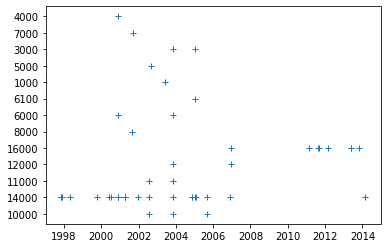

In [58]:
# 1. Plot top 50 Flares

# By start_frequency / time
top_flares.sort_values("start_datetime", ascending = True)
plt.plot(top_flares['start_datetime'], top_flares['start_frequency'], '+')

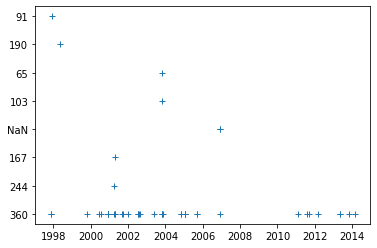

In [59]:
# By flare width / time
plt.plot(top_flares['start_datetime'], top_flares['cme_width'], '+')

<BarContainer object of 3 artists>

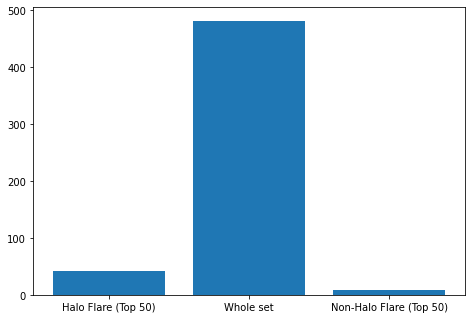

In [60]:
# 2. Halo Barplot
top_50_data = ['Halo Flare (Top 50)', 'Whole set', 'Non-Halo Flare (Top 50)']

halo_flare_counter = 0
for row in top_flares['is_halo']:
    if (row == True):
        halo_flare_counter += 1


top_50_data2 = [halo_flare_counter, 482, 50 - halo_flare_counter]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(top_50_data, top_50_data2)

In [61]:
# What this graph shows is that there's a significant correlation between the number of top 50 flares being halo flares vs
# non halo flares.

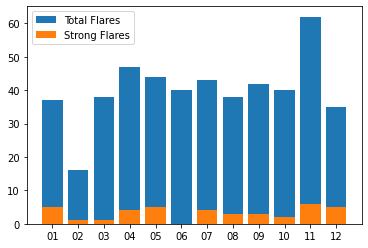

In [62]:
# 3. Do Strong Flares cluster over time?
jan = 0
jan_strong = 0
feb = 0
feb_strong = 0
mar = 0
mar_strong = 0
apr = 0
apr_strong = 0
may = 0
may_strong = 0
jun = 0
jun_strong = 0
jul = 0
jul_strong = 0
aug = 0
aug_strong = 0
sep = 0
sep_strong = 0
oct = 0
oct_strong = 0
nov = 0
nov_strong = 0
dec = 0
dec_strong = 0

for i in range(1, 483):
    slice = df2.at[i, 'start_datetime'].strftime('%m')
    strong = df2.at[i, 'top_50_rank']
    if (slice == '01'):
        jan += 1
        if (strong != 'NaN'):
            jan_strong += 1
    if (slice == '02'):
        feb += 1
        if (strong != 'NaN'):
            feb_strong += 1
    if (slice == '03'):
        mar += 1
        if (strong != 'NaN'):
            mar_strong += 1
    if (slice == '04'):
        apr += 1
        if (strong != 'NaN'):
            apr_strong += 1
    if (slice == '05'):
        may += 1
        if (strong != 'NaN'):
            may_strong += 1
    if (slice == '06'):
        jun += 1
        if (strong != 'NaN'):
            jun_strong += 1
    if (slice == '07'):
        jul += 1
        if (strong != 'NaN'):
            jul_strong += 1
    if (slice == '08'):
        aug += 1
        if (strong != 'NaN'):
            aug_strong += 1
    if (slice == '09'):
        sep += 1
        if (strong != 'NaN'):
            sep_strong += 1
    if (slice == '10'):
        oct += 1
        if (strong != 'NaN'):
            oct_strong += 1
    if (slice == '11'):
        nov += 1
        if (strong != 'NaN'):
            nov_strong += 1
    if (slice == '12'):
        dec += 1
        if (strong != 'NaN'):
            dec_strong += 1

cluster_data = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
cluster_data2 = [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]
cluster_data3 = [jan_strong, feb_strong, mar_strong, apr_strong, may_strong, jun_strong, jul_strong, aug_strong,sep_strong, oct_strong, nov_strong, dec_strong]

fig, ax = plt.subplots()

ax.bar(cluster_data, cluster_data2, label = "Total Flares ")
ax.bar(cluster_data, cluster_data3, label = "Strong Flares")

ax.legend()


In [63]:
# What we see from this stacked bar graph is that strong flares do in fact cluster over time